Title: Sprint 4 Project(vehicle data analysis)
Introduction: For this project, I am going to be examining a dataset of information about various vehicles. I will start by taking a look at the dataset to see if there is anything that needs to be changed or added before visualization. Then I will be creating through streamlit and render to display the visualizations I made.

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


vehicles_df = pd.read_csv('vehicles_us.csv')

vehicles_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [168]:
duplicates = vehicles_df.duplicated()
print(duplicates.sum())


0


There were no duplicates to remove.

In [169]:
print(vehicles_df.isnull().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


There are quite a few missing values in this dataset. I will fill in the missing values with the median of the column.

In [170]:
vehicles_df['model_year'] = vehicles_df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median()))

In [171]:
vehicles_df['cylinders'] = vehicles_df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median()))

In [172]:
def fill_with_median_or_zero(x):
    if x.dropna().empty:  # Check if the group has no non-NaN values
        return x.fillna(0)
    else:
        return x.fillna(x.median())

vehicles_df['odometer'] = vehicles_df.groupby('model_year')['odometer'].transform(fill_with_median_or_zero)


In [173]:
vehicles_df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
26838,7995,2010.0,chrysler 300,good,8.0,gas,113883.0,automatic,sedan,white,NaN,2018-07-10,32
49689,24000,2007.0,gmc sierra 2500hd,excellent,8.0,diesel,140000.0,automatic,pickup,silver,1.0,2019-01-17,61
25019,10995,2008.0,ford f150,excellent,8.0,gas,148000.0,automatic,truck,white,1.0,2018-09-12,44
44195,5900,2007.0,toyota highlander,good,6.0,gas,152194.0,automatic,SUV,NaN,NaN,2018-11-14,58
46682,11450,2004.0,jeep wrangler,like new,6.0,gas,112723.0,manual,offroad,red,1.0,2019-01-25,36
32530,7995,2009.0,chevrolet silverado 1500,like new,8.0,gas,172000.0,automatic,truck,silver,1.0,2018-11-06,26
12442,16000,2008.0,toyota tacoma,good,6.0,gas,135000.0,automatic,truck,grey,NaN,2018-07-05,23
13070,17995,2015.0,ford f150,excellent,8.0,gas,175280.0,automatic,pickup,white,1.0,2019-01-24,69
30403,5495,2008.0,ford escape,excellent,6.0,gas,126293.0,automatic,wagon,grey,1.0,2019-01-12,101
11289,7900,2009.0,toyota camry,excellent,4.0,gas,64000.0,automatic,sedan,white,NaN,2019-02-12,16


Now that the missing values are filled, the final step before beginning visualization will be to remove any outliers from the dataset that may skew the data.

In [174]:
def remove_outliers(vehicles_df, column, lower_quantile=0.05, upper_quantile=0.95):
    lower_bound = vehicles_df[column].quantile(lower_quantile)
    upper_bound = vehicles_df[column].quantile(upper_quantile)
    return vehicles_df[(vehicles_df[column] >= lower_bound) & (vehicles_df[column] <= upper_bound)]

print("\nRemoving outliers from `model_year` and `price`...")
vehicles_df = remove_outliers(vehicles_df, 'model_year')
vehicles_df = remove_outliers(vehicles_df, 'price')



Removing outliers from `model_year` and `price`...


In [175]:
vehicles_df.isnull().sum()

price               0
model_year          0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
transmission        0
type                0
paint_color      7883
is_4wd          22890
date_posted         0
days_listed         0
dtype: int64

Now that I have done some initial processing on the dataset, I will begin to work on visualization.

First I will create a scatterplot comparing the price of the vehicle to the year it was made.

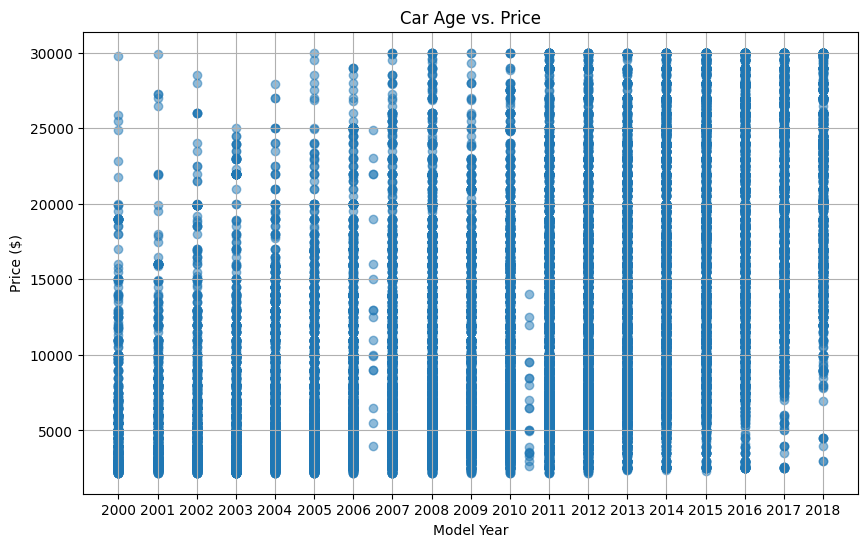

In [176]:
plt.figure(figsize=(10, 6))
plt.scatter(vehicles_df['model_year'], vehicles_df['price'], alpha=0.5)
plt.title('Car Age vs. Price')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.grid(True)

plt.xticks(np.arange(int(vehicles_df['model_year'].min()), 
                     int(vehicles_df['model_year'].max()) + 1, 1))
plt.show()  

It looks like the average price of a vehicle made past 2015 will have an overall higher value that cars made in previous years.

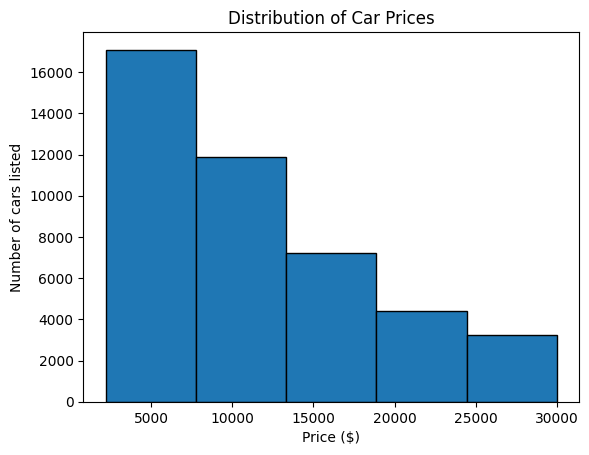

In [177]:
# Create histogram
plt.hist(vehicles_df['price'], bins=5, edgecolor='black')

# Add titles and labels
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of cars listed')

# Show plot
plt.show()

It looks like the majority of cars are listed for less than around $14000.